<a href="https://colab.research.google.com/github/DuttAbir/ML_projects_python/blob/main/05_Loan_status_prediction_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

**Data Processing**
 https://drive.google.com/file/d/1LIvIdqdHDFEGnfzIgEh4L6GFirzsE3US/view

In [2]:
loan_dataset = pd.read_csv('/content/LoanApprovalPrediction.csv')
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_dataset.shape

(598, 13)

In [4]:
#statistical measurement
loan_dataset.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [5]:
#number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14


In [6]:
#dropping missing values
loan_dataset = loan_dataset.dropna()
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [7]:
loan_dataset.shape

(505, 13)

In [8]:
#Label encoding (for columns having text values , should be replaced with integer labels)
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
loan_dataset.head()

<ipython-input-8-87c98abed505>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [9]:
#dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0.0,289
2.0,90
1.0,84
3.0,42


**Data Visualizations**

<Axes: xlabel='Education', ylabel='count'>

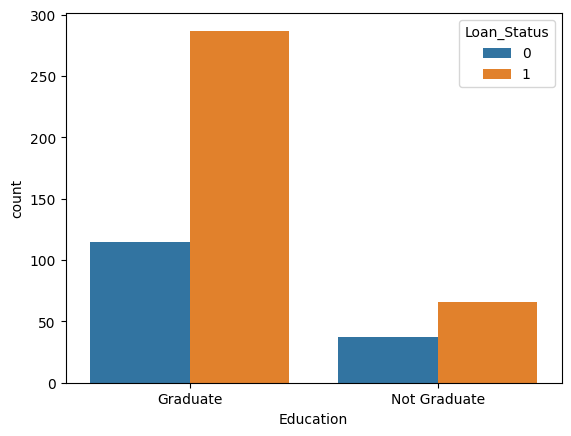

In [10]:
#education & loan status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

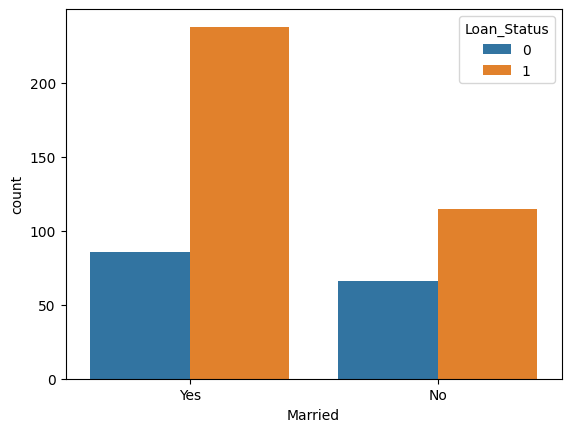

In [11]:
#marital & loan status
sns.countplot(x='Married', hue = 'Loan_Status', data=loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

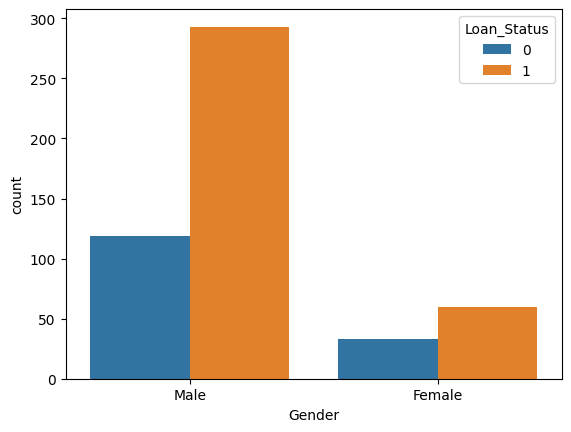

In [12]:
#gender and loan status
sns.countplot(x='Gender', hue = 'Loan_Status', data=loan_dataset)

In [14]:
#convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
loan_dataset.head()

<ipython-input-14-1badd2b3eb35>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2.0,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [16]:
#separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

**Train Test Split**

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(505, 11) (454, 11) (51, 11)


**Training the model : Support Vector Machine**

In [19]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

**Model Evaluation**

In [20]:
#accuracy score on train data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8039647577092511


In [21]:
#accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7647058823529411


**Making s predictive system**

In [37]:
#predictive system
input_data = (0,0,3,0,0,2563,508,10350.0,360,0,0)
input_data_df = pd.DataFrame([input_data], columns=X_train.columns)
prediction = classifier.predict(input_data_df)
if (prediction[0] == 0):
  print('The loan is not approved')
else:
  print('The loan is approved')

The loan is approved
